In [26]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas
import datetime


In [27]:
def select_voo_gol(aero_saindo,aero_chegando,data):
    navegador.get('https://b2c.voegol.com.br/compra')
    
    
    time.sleep(7)
    
    try:
        navegador.find_element(By.XPATH,'/html/body/div[10]/div[2]/div/div[1]/button/img').click()
    except:
        pass
        
    navegador.find_element(By.XPATH,'//*[@id="compra"]/b2c-shopping/section/form/div[1]/div[2]/div[1]/div[1]/b2c-dropdown/div/div[1]/fieldset').click() 
    navegador.find_element(By.XPATH,'//*[@id="drop_flightType_emission"]/ul/li[2]/b2c-radio/div/label/span').click()
    
    campo = navegador.find_element(By.XPATH,'//*[@id="input-saindo-de"]')
    campo2 = navegador.find_element(By.XPATH,'//*[@id="input-indo-para"]')
    campo3 = navegador.find_element(By.XPATH,'//*[@id="departureDate"]')
    
    time.sleep(1)
    campo.click()
    
    try:
        navegador.find_element(By.XPATH,'/html/body/div[10]/div[2]/div/div[1]/button/img').click()
        campo.click()
        ActionChains(navegador)\
            .send_keys_to_element(campo, aero_saindo)\
            .send_keys(Keys.RETURN)\
            .perform()
    except:
        print('passou')
    time.sleep(1)
    ActionChains(navegador)\
        .send_keys_to_element(campo, aero_saindo)\
        .send_keys(Keys.RETURN)\
        .perform()
        
    time.sleep(1)
    
    try:
        navegador.find_element(By.XPATH,'/html/body/div[10]/div[2]/div/div[1]/button/img').click()
        campo.click()
        ActionChains(navegador)\
            .send_keys_to_element(campo, aero_saindo)\
            .send_keys(Keys.RETURN)\
            .perform()
    except:
        pass
    
    navegador.find_element(By.XPATH,'//*[@id="opt_leavingAiports_1"]').click()
    time.sleep(1)
    campo2.click()
    
    time.sleep(1)
    
    ActionChains(navegador)\
        .send_keys_to_element(campo2, aero_chegando)\
        .send_keys(Keys.RETURN)\
        .perform()
    navegador.find_element(By.XPATH,'//*[@id="opt_goingToAiports_1"]').click()
    time.sleep(1)
    campo3.click()
    time.sleep(1)
    navegador.find_element(By.XPATH,f'//*[@id="departureDate{data}"]/span').click()
    time.sleep(1)
    navegador.find_element(By.XPATH,'//*[@id="btn_searchFlights_emission"]').click()
    

In [28]:
def pegar_info(tipo):
    lista_dados = []
    a =0
    stop_point = False
    while stop_point == False:
        a += 1
        try:
            dados = navegador.find_element(By.XPATH,f'//*[@id="lbl_{tipo}_{a}_emission"]')
            lista_dados.append(dados.text)
        except:
            stop_point = True
    return lista_dados

    

In [29]:
def criar_objeto():
    Partida = pegar_info('origin')
    Data = navegador.find_element(By.XPATH,'//*[@id="opt_currentDate_emission"]').text
    Chegada = pegar_info('destination')
    Tempo = pegar_info('duration')
    Tipo = pegar_info('segment')
    Preco = pegar_info('priceValue')

    gol_voou = {
        'Data':Data,
        'Partida':Partida,
        'Chegada':Chegada,
        'Tempo':Tempo,
        'Tipo':Tipo,
        'Preco':Preco
    }
    print(Data)
    return gol_voou

In [30]:
hoje = datetime.date.today()
print(hoje)
ultimo_dia = datetime.date(hoje.year,hoje.month + 1,2) - datetime.timedelta(days=1)
ultimo_dia = ultimo_dia.strftime("%d%m%Y")
print(ultimo_dia)

2024-11-25
01122024


In [ ]:
hoje = datetime.date.today()
dia = hoje.strftime("%d%m%Y")
ultimo_dia = datetime.date(hoje.year,hoje.month + 1,2) - datetime.timedelta(days=1)
ultimo_dia = ultimo_dia.strftime("%d%m%Y")


lista = []
while dia != ultimo_dia:
    navegador = webdriver.Chrome()
    navegador.maximize_window()
    hoje += datetime.timedelta(days=2)
    dia = hoje.strftime("%d%m%Y")
    select_voo_gol("São Paulo  -  Congonhas - CGH","Rio de Janeiro  -  Santos Dumont - SDU",f'{dia}')
    time.sleep(8)
    
    gol_voou = criar_objeto()
    lista.append(gol_voou)
    
    time.sleep(1)
    navegador.quit()
    
print(lista)

In [ ]:
df = pandas.DataFrame(lista[0])
df1 = pandas.DataFrame(lista[1])
df2 = pandas.DataFrame(lista[2])
df

In [ ]:

df = pandas.concat([df, df1,df2], ignore_index=True)
print(df)

                                            Data      Partida      Chegada  \
0      DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84  CGH - 09:15  SDU - 10:25   
1      DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84  CGH - 08:40  SDU - 09:50   
2      DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84  CGH - 07:30  SDU - 08:40   
3      DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84  CGH - 10:00  SDU - 11:05   
4      DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84  CGH - 18:25  SDU - 19:30   
5      DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84  CGH - 17:35  SDU - 18:40   
6      DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84  CGH - 16:45  SDU - 17:50   
7      DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84  CGH - 16:15  SDU - 17:20   
8      DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84  CGH - 15:10  SDU - 16:15   
9      DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84  CGH - 14:00  SDU - 15:05   
10     DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84  CGH - 13:00  SDU - 14:05   
11     DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84  CGH - 12:15  S

In [ ]:
df['Dia'] = df['Data'].str.split('\n-').str.get(0).str.split(',').str.get(1)
df['Dia_da_semana'] = df['Data'].str.split('\n-').str.get(0).str.split(',').str.get(0)
df['Partida_local'] = df['Partida'].str.split('-').str.get(0)
df['Partida_horario'] = df['Partida'].str.split('-').str.get(1)
df['Chegada_local'] = df['Chegada'].str.split('-').str.get(0)
df['Chegada_horario'] = df['Chegada'].str.split('-').str.get(1)
df['Preco'] = df['Preco'].str.replace('R$','').str.replace('.','').str.replace(',','.')
df

,Data,Partida,Chegada,Tempo,Tipo,Preco,Dia,Dia_da_semana,Partida_local,Partida_horario,Chegada_local,Chegada_horario
0,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 09:15,SDU - 10:25,01:10,Direto,1001.84,17/11,DOMINGO,CGH,09:15,SDU,10:25
1,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 08:40,SDU - 09:50,01:10,Direto,1001.84,17/11,DOMINGO,CGH,08:40,SDU,09:50
2,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 07:30,SDU - 08:40,01:10,Direto,1001.84,17/11,DOMINGO,CGH,07:30,SDU,08:40
3,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 10:00,SDU - 11:05,01:05,Direto,2391.01,17/11,DOMINGO,CGH,10:00,SDU,11:05
4,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 18:25,SDU - 19:30,01:05,Direto,2393.01,17/11,DOMINGO,CGH,18:25,SDU,19:30
5,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 17:35,SDU - 18:40,01:05,Direto,2393.01,17/11,DOMINGO,CGH,17:35,SDU,18:40
6,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 16:45,SDU - 17:50,01:05,Direto,2393.01,17/11,DOMINGO,CGH,16:45,SDU,17:50
7,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 16:15,SDU - 17:20,01:05,Direto,2393.01,17/11,DOMINGO,CGH,16:15,SDU,17:20
8,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 15:10,SDU - 16:15,01:05,Direto,2393.01,17/11,DOMINGO,CGH,15:10,SDU,16:15
9,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 14:00,SDU - 15:05,01:05,Direto,2393.01,17/11,DOMINGO,CGH,14:00,SDU,15:05


In [ ]:
del df['Chegada']
del df['Partida']
del df['Data']
df

,Tempo,Tipo,Preco,Dia,Dia_da_semana,Partida_local,Partida_horario,Chegada_local,Chegada_horario
0,01:10,Direto,1001.84,17/11,DOMINGO,CGH,09:15,SDU,10:25
1,01:10,Direto,1001.84,17/11,DOMINGO,CGH,08:40,SDU,09:50
2,01:10,Direto,1001.84,17/11,DOMINGO,CGH,07:30,SDU,08:40
3,01:05,Direto,2391.01,17/11,DOMINGO,CGH,10:00,SDU,11:05
4,01:05,Direto,2393.01,17/11,DOMINGO,CGH,18:25,SDU,19:30
5,01:05,Direto,2393.01,17/11,DOMINGO,CGH,17:35,SDU,18:40
6,01:05,Direto,2393.01,17/11,DOMINGO,CGH,16:45,SDU,17:50
7,01:05,Direto,2393.01,17/11,DOMINGO,CGH,16:15,SDU,17:20
8,01:05,Direto,2393.01,17/11,DOMINGO,CGH,15:10,SDU,16:15
9,01:05,Direto,2393.01,17/11,DOMINGO,CGH,14:00,SDU,15:05


In [11]:
import pandas as pd
dados = pd.read_csv("../1_bases_tratadas/definitivo.csv")
display(dados)


,Data,Partida,Chegada,Tempo,Tipo,Preco
0,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 09:15,SDU - 10:25,01:10,Direto,"R$ 1.001,84"
1,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 08:40,SDU - 09:50,01:10,Direto,"R$ 1.001,84"
2,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 07:30,SDU - 08:40,01:10,Direto,"R$ 1.001,84"
3,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 10:00,SDU - 11:05,01:05,Direto,"R$ 2.391,01"
4,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 18:25,SDU - 19:30,01:05,Direto,"R$ 2.393,01"
5,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 17:35,SDU - 18:40,01:05,Direto,"R$ 2.393,01"
6,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 16:45,SDU - 17:50,01:05,Direto,"R$ 2.393,01"
7,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 16:15,SDU - 17:20,01:05,Direto,"R$ 2.393,01"
8,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 15:10,SDU - 16:15,01:05,Direto,"R$ 2.393,01"
9,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 14:00,SDU - 15:05,01:05,Direto,"R$ 2.393,01"


In [1]:
%pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
dados = pd.read_csv("../1_bases_tratadas/definitivo.csv")

In [ ]:
from sqlalchemy import create_engine 
engine = create_engine('sqlite:///dados.db', echo = True)

In [14]:
dados.to_sql('dados', con  = engine, if_exists='replace', index=False)

2024-11-26 01:43:36,263 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-11-26 01:43:36,274 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("dados")
2024-11-26 01:43:36,276 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-26 01:43:36,278 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("dados")
2024-11-26 01:43:36,280 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-26 01:43:36,281 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2024-11-26 01:43:36,283 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-26 01:43:36,283 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='view' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2024-11-26 01:43:36,286 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-26 01:43:36,286 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("dados")
2024-11-26 01:43:36,288 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-26 01:43:3

13

In [15]:
dflido = pd.read_sql('SELECT * FROM dados', con = engine)
dflido

2024-11-26 01:43:40,096 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-11-26 01:43:40,098 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("SELECT * FROM dados")
2024-11-26 01:43:40,098 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-26 01:43:40,100 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("SELECT * FROM dados")
2024-11-26 01:43:40,100 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-26 01:43:40,100 INFO sqlalchemy.engine.Engine SELECT * FROM dados
2024-11-26 01:43:40,102 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-26 01:43:40,106 INFO sqlalchemy.engine.Engine ROLLBACK


,Unnamed: 0,Data,Partida,Chegada,Tempo,Tipo,Preco
0,0,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 09:15,SDU - 10:25,01:10,Direto,"R$ 1.001,84"
1,1,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 08:40,SDU - 09:50,01:10,Direto,"R$ 1.001,84"
2,2,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 07:30,SDU - 08:40,01:10,Direto,"R$ 1.001,84"
3,3,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 10:00,SDU - 11:05,01:05,Direto,"R$ 2.391,01"
4,4,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 18:25,SDU - 19:30,01:05,Direto,"R$ 2.393,01"
5,5,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 17:35,SDU - 18:40,01:05,Direto,"R$ 2.393,01"
6,6,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 16:45,SDU - 17:50,01:05,Direto,"R$ 2.393,01"
7,7,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 16:15,SDU - 17:20,01:05,Direto,"R$ 2.393,01"
8,8,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 15:10,SDU - 16:15,01:05,Direto,"R$ 2.393,01"
9,9,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 14:00,SDU - 15:05,01:05,Direto,"R$ 2.393,01"


In [2]:
import sqlite3
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('sqlite:///banco.db', echo=True)
with engine.begin() as connection:
  (
        """
        CREATE TABLE IF NOT EXISTS dados (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            Dia TEXT,
            Preco REAL,
            Partida_horario TEXT,
            Data TEXT,
            Chegada TEXT,
            Tempo TEXT
        );
        """
    )
dados_exemplo = {
    "Dia": ["2024-11-01", "2024-11-02", "2024-11-03", "2024-11-04", "2024-11-05", "2024-11-06", "2024-11-07", "2024-11-08", "2024-11-09", "2024-11-10", "2024-11-11", "2024-11-12", "2024-11-13", "2024-11-14"],
    "Preco": [1.00184, 1.00184, 1.00184, 1.72801, 1.72801, 1.72801, 2.39301, 2.39301, 2.39301, 2.39301, 933.77, 933.77, 933.77, 777.01],
    "Partida_horario": ["10:00", "15:30", "20:45", "09:15", "11:45", "13:00", "14:00", "14:30", "07:30", "17:35", "20:10", "19:40", "18:55", "16:45"],
    "Data": ["DOMINGO, 17/11", "DOMINGO, 17/11", "DOMINGO, 17/11", "DOMINGO, 17/11", "DOMINGO, 17/11", "DOMINGO, 17/11", "DOMINGO, 17/11", "DOMINGO, 17/11", "DOMINGO, 17/11", "DOMINGO, 17/11", "DOMINGO, 17/11", "DOMINGO, 17/11", "DOMINGO, 17/11", "DOMINGO, 17/11"],
    "Chegada": ["10:25", "09:50", "08:40", "11:05", "19:30", "18:40", "17:50", "17:20", "16:15", "15:05", "14:05", "13:20", "12:20", ""],  # Padronized length
    "Tempo": ["01:10", "01:10", "01:10", "01:10", "01:05", "01:05", "01:05", "01:05", "01:05", "01:05", "01:05", "01:05", "01:05", "01:05"]
}

df = pd.DataFrame(dados_exemplo)
df.to_sql('dados', con=engine, if_exists='replace')

2024-11-26 11:53:22,613 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-11-26 11:53:22,613 INFO sqlalchemy.engine.Engine COMMIT
2024-11-26 11:53:22,613 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-11-26 11:53:22,630 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("dados")
2024-11-26 11:53:22,630 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-26 11:53:22,630 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("dados")
2024-11-26 11:53:22,630 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-26 11:53:22,630 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2024-11-26 11:53:22,630 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-26 11:53:22,630 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='view' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2024-11-26 11:53:22,630 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-26 11:53:22,643 INFO sqlalchemy.

14

In [3]:
df_lido= pd.read_sql('SELECT * FROM dados', con=engine)
print(df_lido) 


2024-11-26 11:53:25,231 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-11-26 11:53:25,233 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("SELECT * FROM dados")
2024-11-26 11:53:25,233 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-26 11:53:25,233 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("SELECT * FROM dados")
2024-11-26 11:53:25,234 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-26 11:53:25,234 INFO sqlalchemy.engine.Engine SELECT * FROM dados
2024-11-26 11:53:25,236 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-26 11:53:25,240 INFO sqlalchemy.engine.Engine ROLLBACK
    index         Dia      Preco Partida_horario            Data Chegada  \
0       0  2024-11-01    1.00184           10:00  DOMINGO, 17/11   10:25   
1       1  2024-11-02    1.00184           15:30  DOMINGO, 17/11   09:50   
2       2  2024-11-03    1.00184           20:45  DOMINGO, 17/11   08:40   
3       3  2024-11-04    1.72801           09:15  DOMINGO, 17/11   11:05   
4       4  

In [1]:
import sqlite3
print(sqlite3.sqlite_version)


3.45.3


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Data     13 non-null     object
 1   Partida  13 non-null     object
 2   Chegada  13 non-null     object
 3   Tempo    13 non-null     object
 4   Tipo     13 non-null     object
 5   Preco    13 non-null     object
dtypes: object(6)
memory usage: 756.0+ bytes


In [ ]:
dados.describe().round()

,Data,Partida,Chegada,Tempo,Tipo,Preco
count,13,13,13,13,13,13
unique,1,13,13,2,1,3
top,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 09:15,SDU - 10:25,01:05,Direto,"R$ 2.393,01"
freq,13,1,1,10,13,9


In [ ]:
dados.tail()

,Data,Partida,Chegada,Tempo,Tipo,Preco
8,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 15:10,SDU - 16:15,01:05,Direto,"R$ 2.393,01"
9,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 14:00,SDU - 15:05,01:05,Direto,"R$ 2.393,01"
10,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 13:00,SDU - 14:05,01:05,Direto,"R$ 2.393,01"
11,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 12:15,SDU - 13:20,01:05,Direto,"R$ 2.393,01"
12,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84",CGH - 11:15,SDU - 12:20,01:05,Direto,"R$ 2.393,01"


In [ ]:
dados.sample(1, random_state=1).T

,2
Data,"DOMINGO, 17/11\n- A PARTIR DE R$ 1.001,84"
Partida,CGH - 07:30
Chegada,SDU - 08:40
Tempo,01:10
Tipo,Direto
Preco,"R$ 1.001,84"


In [ ]:
dados.index

RangeIndex(start=0, stop=13, step=1)

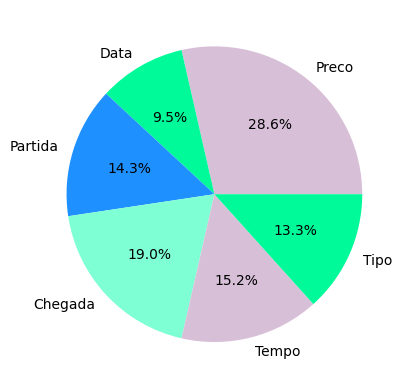

In [ ]:
import matplotlib.pyplot as plt
dados = ["Preco", "Data", "Partida","Chegada","Tempo","Tipo"]
quantidades = [30,10,15,20,16,14]
cores = ["#D8BFD8", "#00FA9A", "#1E90FF", "#7FFFD4"]
grafico = plt.pie(quantidades, labels = dados, autopct = "%1.1f%%", colors = cores)
plt.show()

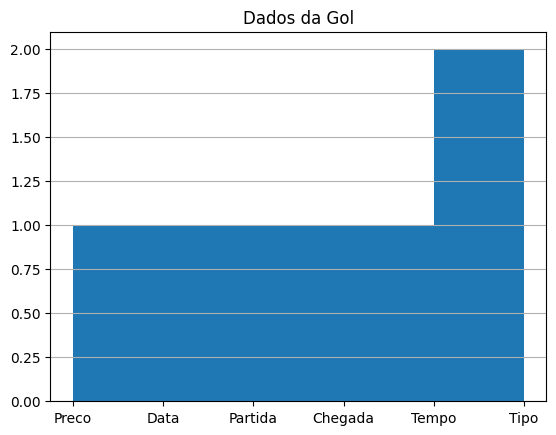

In [ ]:
dados = ["Preco", "Data", "Partida","Chegada","Tempo","Tipo"]

plt.hist(dados, 5)
plt.title('Dados da Gol')
plt.grid(axis='y')
plt.show()

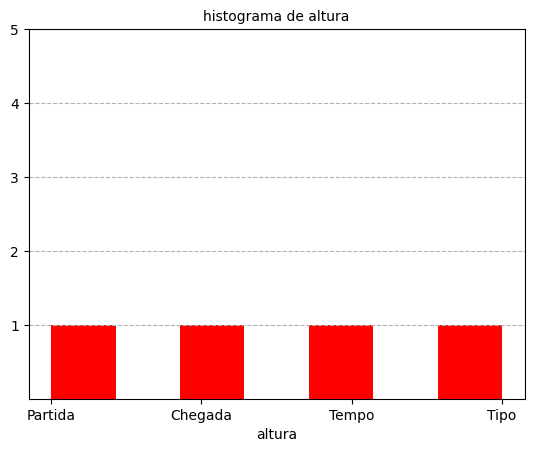

In [ ]:
dados = [ "Partida","Chegada","Tempo","Tipo"]
plt.hist(dados, 7, color ='red')
plt.grid(axis = 'y', linestyle = '--')
plt.title('histograma de altura', fontsize = 10)
plt.yticks([1, 2, 3, 4, 5])
plt.xlabel('altura')
plt.show()

In [ ]:
import missingno as msno

In [ ]:
msno.matrix(dados)


In [ ]:
msno.heatmap(dados)

In [1]:
import plotly.express as px


In [13]:
fig = px.box(dados, y="Preco", title="Boxplot dos Preços", points="all")
fig.show()

In [ ]:
#Não existe nulos